In [109]:
import numpy as np
import os
import matplotlib.pyplot as plt

#### Always use this routine on a root folder before the data folder. ################################
Alloy_name = "TiZrVNbHfTa" #Just to name the figure
folder_data = os.path.abspath(r'drxcomtemperatura') #Name of data folder

positions = []

# Setting XRD measurement/data information <-- Change these parameters for each measurement ###################################
step = 0.02  #degrees
first_point = 10 #degrees
last_point = 40 #degrees










#--------------------------------------------DATA IMPORT AND TREATMENT-------------------------------------------------------------------#

i=0
for diretorio, subpastas, arquivos in os.walk(folder_data):
    for arquivo in arquivos:
        if '.scn' in arquivo:
            data=np.loadtxt(os.path.join(diretorio, arquivo)) #import data from each .dat in the folder_data
            data = np.round(data,decimals=5)   
            size_positions = len(data)
            positions = data[0:,0]
            i+1
            if i>0:
                break
            # matrix[np.where(matrix[1:,0]==float(arquivo[15:-21]))[0][0]+1,1:] = data[0:,1] #search the row position of temperature of each data on the column 0 and replace it with the data.
      



temperatures = []
for diretorio, subpastas, arquivos in os.walk(folder_data):
    for arquivo in arquivos:
        if '.scn' in arquivo:
            print(arquivo)
            temperatures.append(float(arquivo[-10:-5])) #search each data temperature on all .dat files and append to a list
            
temperatures.sort() 
temperatures = np.array(temperatures)  #transforms temperature list in a numpy array and correct its magnitude

matrix = np.zeros([len(temperatures)+1,size_positions+1]) #creates a full of zeros matrix with the size and shape of the data.
matrix[1:,0] = temperatures  #turns the column 0 into a temperature header
matrix[0,1:] = positions #turns the row 0 into a position header
#note that the position [0,0] of the matrix are always 0 
for diretorio, subpastas, arquivos in os.walk(folder_data):
    for arquivo in arquivos:
        if '.scn' in arquivo:
            data=np.loadtxt(os.path.join(diretorio, arquivo)) #import data from each .dat in the folder_data
            data = np.round(data,decimals=5)   
            # print(len(data))
            matrix[np.where(matrix[1:,0]==float(arquivo[-10:-5]))[0][0]+1,1:] = data[0:,1] #search the row position of temperature of each data on the column 0 and replace it with the data.
            
            
            
#intensity = matrix[1:,1:]            

Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#1_100.0C.scn
Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#2_025.0C.scn
Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#2_175.0C.scn
Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#3_250.0C.scn
Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#4_325.0C.scn
Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#5_400.0C.scn
Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#6_475.0C.scn
Detector scan Om 0.0° 2T 10.0° - 40.0° ContHCR FB-NA#7_550.0C.scn


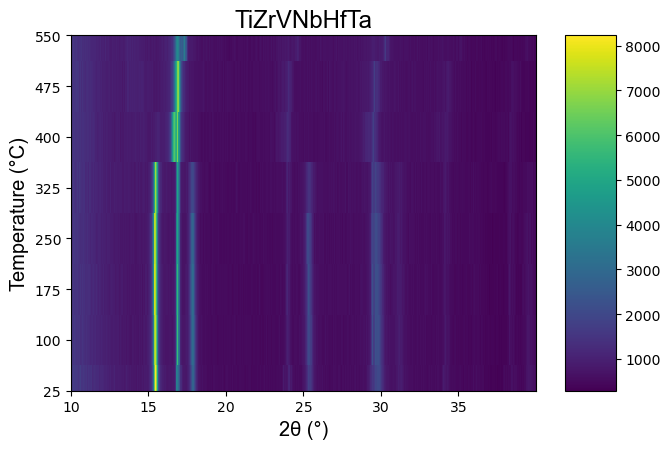

In [125]:
#Sobre o comando Plot=plt.pcolormesh (X, Y, Intensidade dada pela matriz, camp é o estilo de cor)


#Setting plot limits information <- Change these parameters for each different plot ########################################
xmin=first_point 
xmax = last_point









#-----------------------------------------------------------PLOT CODE--------------------------#
intensity = matrix[1:,1:]   #data matrix without the temperature and positions headers
fig = plt.figure(figsize=(7.5,4.615))
k=0
np.min(intensity[intensity>k])
ymin = min(temperatures)
ymax = max(temperatures)

#-------------------------##################################################################################################

v_max =np.amax(matrix[1:,int(round((xmin - matrix[0,1])/step)):]) #This line determinates the max value in matrix from the xmin choosen


#styles 'viridis' or 'jet'
Plot=plt.pcolormesh(positions, temperatures, intensity, cmap='viridis', vmin=np.min(intensity[intensity>k]), vmax = np.max(intensity[intensity>k]))

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks(np.arange(xmin,xmax,5))
# plt.yticks(np.arange(ymin,ymax+1,20))
plt.yticks(temperatures)

plt.title(Alloy_name, family='Arial', size='xx-large', loc='center')

plt.xlabel('2θ (°)', family='Arial', size='x-large')
plt.ylabel('Temperature (°C)', family='Arial', size='x-large')

cbar = plt.colorbar(Plot, aspect=7)

# Rename labels on colorbar
# vlabels = [i for i in range(0,int(round(v_max)), 1000)]
# vlabels.append(v_max)
# cbar.set_ticks(vlabels)
# cbar.set_ticklabels(vlabels)


my_file = f'{Alloy_name}.png'


# ###### Verifies if already exists an figure with same name and iterate the fig name
# i=0
# for diretorio, subpastas, arquivos in os.walk(folder_data): 
#     for arquivo in arquivos:
#         if '.png' in arquivo:
#             i = float(arquivo[0])+1
            

plt.savefig(os.path.join(folder_data,str(i)+ my_file), dpi=200, bbox_inches='tight')

plt.show()